In [1]:
# Import all the necessary packages

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">

### **Analysis #3**

### Composition of Total Rentals per Month
- We know that there are little comparison between the total rentals each store had. 
    - We want to know what is the make up of those total rentals based off categories

**1. In pgAdmin, I set up my query so I am retrieving 3 columns that I need:**
- Date (Month/Year)
- Store ID
- Category Name
- Total # of rental per category for each month

**2. The query consists of utilizing:**
- JOINS
- Subquery
- GROUP BY
- ORDER BY
- Aggregation Syntax
- Date manipulation 

**3. Assign the query to a dataframe (cat_per_store)**

**4. Data manipulation using Pandas to clean up data for visualization**

**5. Create a graph that shows the results of the query.**
- Use seaborn and matplotlib to create and customize the graph 

</div>

In [2]:
# Connec to the DVD rental Database

conn = psycopg2.connect(
    dbname = 'dvdrental',
    user = 'postgres',
    password = 'Kimmy027!',
    port = 5432
)

In [3]:
# Use pandas to read the sql query and turn into a dataframe
cat_per_store = pd.read_sql("""
    WITH T1 AS (
                SELECT
                        EXTRACT(year FROM r.rental_date) AS year,
                        EXTRACT(month FROM r.rental_date) AS month,
                        s.store_id AS ID_store,
                        c.name AS Category_Name,
                        COUNT(*) AS Rental_Count
                FROM rental r
                JOIN payment p ON r.rental_id = p.rental_id
                JOIN staff st ON p.staff_id = st.staff_id
                JOIN store s ON st.store_id = s.store_id
                JOIN inventory i ON r.inventory_id = i.inventory_id
                JOIN film f ON i.film_id = f.film_id
                JOIN film_category fc ON f.film_id = fc.film_id
                JOIN category c ON fc.category_id = c.category_id
                GROUP BY year, month, ID_store, Category_Name
                ORDER BY year, month, ID_store, Category_Name)

    SELECT
            TO_CHAR(TO_DATE(CONCAT(year, '-', month, '-01'), 'YYYY-MM-DD'), 'MM/YYYY') AS Month_Year,
            ID_store,
            Category_Name,
            Rental_Count
    FROM T1;""", 
    con = conn)

print(cat_per_store)


    month_year  id_store category_name  rental_count
0      06/2005         1        Action            87
1      06/2005         1     Animation            77
2      06/2005         1      Children            53
3      06/2005         1      Classics            57
4      06/2005         1        Comedy            63
..         ...       ...           ...           ...
122    02/2006         2         Music             7
123    02/2006         2           New             7
124    02/2006         2        Sci-Fi             2
125    02/2006         2        Sports             7
126    02/2006         2        Travel             6

[127 rows x 4 columns]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
# Separate data for Store 1
cat_store1 = cat_per_store[cat_per_store['id_store'] == 1]

# Turn dataframe so the date(month_year) is the index and the category names are the column
    # I am doing this to check all of the total number of rentals per category for each month
        # This will be our stacked bars 
cat_store1 = cat_store1.pivot_table(index='month_year', columns='category_name', values='rental_count', aggfunc='sum')

# Renaming our indexes
cat_store1 = cat_store1.rename(index={'06/2005': 'June 2005'})
cat_store1 = cat_store1.rename(index={'02/2006': 'February 2006'})
cat_store1 = cat_store1.rename(index={'07/2005': 'July 2005'})
cat_store1 = cat_store1.rename(index={'08/2005': 'August 2005'})

print(cat_store1)


category_name  Action  Animation  Children  Classics  Comedy  Documentary  \
month_year                                                                  
February 2006       8         10         6         2       6            2   
June 2005          87         77        53        57      63           64   
July 2005         226        244       199       200     178          215   
August 2005       189        213       153       168     180          192   

category_name  Drama  Family  Foreign  Games  Horror  Music  New  Sci-Fi  \
month_year                                                                 
February 2006      5       7        4      7      10      4    6       6   
June 2005         63      62       62     59      53     59   50      73   
July 2005        241     233      219    201     182    178  188     221   
August 2005      189     190      179    154     149    146  165     205   

category_name  Sports  Travel  
month_year                     
February 2006   

In [5]:
# Separate data for Store 1
cat_store2 = cat_per_store[cat_per_store['id_store'] == 2]

# Turn dataframe so the date(month_year) is the index and the category names are the column
    # I am doing this to check all of the total number of rentals per category for each month
        # This will be our stacked bars 
cat_store2 = cat_store2.pivot_table(index='month_year', columns='category_name', values='rental_count', aggfunc='sum')

# Renaming our indexes
cat_store2 = cat_store2.rename(index={'06/2005': 'June 2005'})
cat_store2 = cat_store2.rename(index={'02/2006': 'February 2006'})
cat_store2 = cat_store2.rename(index={'07/2005': 'July 2005'})
cat_store2 = cat_store2.rename(index={'08/2005': 'August 2005'})

print(cat_store2)

category_name  Action  Animation  Children  Classics  Comedy  Documentary  \
month_year                                                                  
February 2006     9.0       11.0       NaN       7.0     3.0          4.0   
June 2005        61.0       70.0      64.0      62.0    54.0         69.0   
July 2005       238.0      245.0     207.0     184.0   205.0        214.0   
August 2005     195.0      195.0     179.0     180.0   162.0        177.0   

category_name  Drama  Family  Foreign  Games  Horror  Music    New  Sci-Fi  \
month_year                                                                   
February 2006    2.0     6.0      7.0    7.0     2.0    7.0    7.0     2.0   
June 2005       67.0    69.0     71.0   67.0    43.0   55.0   62.0    70.0   
July 2005      222.0   227.0    213.0  191.0   184.0  170.0  205.0   241.0   
August 2005    164.0   194.0    198.0  198.0   150.0  131.0  181.0   180.0   

category_name  Sports  Travel  
month_year                     
Febr

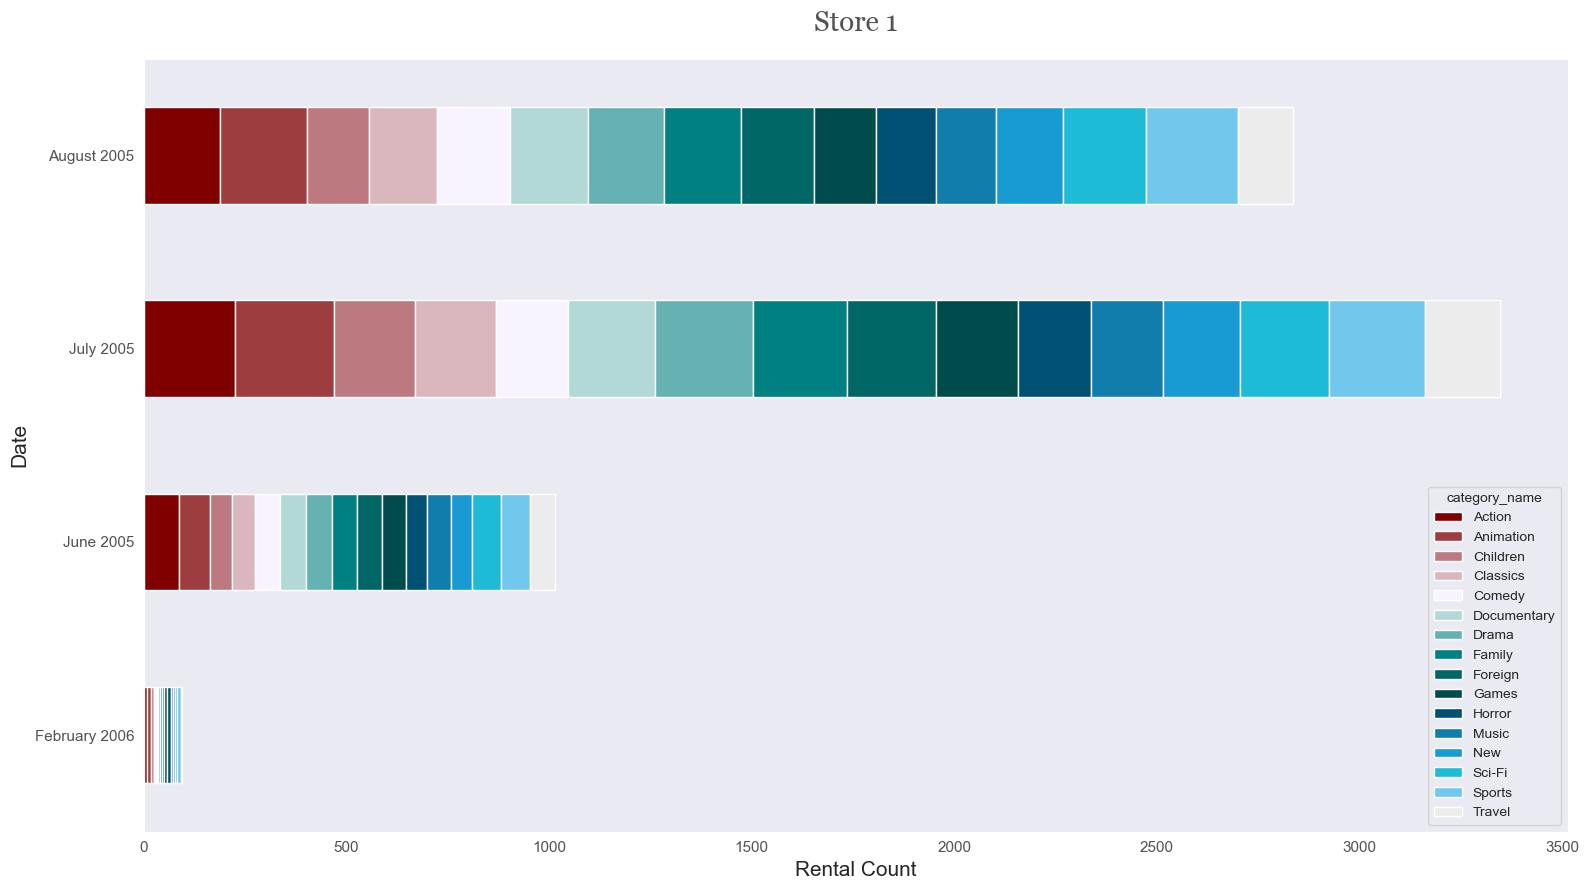

In [6]:
# Create our graph for Store 1

font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#800000', '#9e3d40', '#bc7a80','#dab7bf', '#f8f4ff', '#b2d8d8','#66b2b2','#008080',
         '#006666','#004c4c','#005073','#107dac','#189ad3','#1ebbd7','#71c7ec','#ececec'] # colors of each bars
sns.set_style('dark') # graph style

# Plot of data
ax = cat_store1.plot.barh(align='center', stacked=True, figsize=(16,9), color = colors)

# Title 
title = plt.title('Store 1', pad=20, fontsize=20, color=font_color, **csfont)
title.set_position([.5, 1.02])

# Axis Labels
ax.set_xlabel("Rental Count", fontsize = 15)
ax.set_ylabel("Date", fontsize = 15)

# Axis ticks        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(11)
plt.xticks(color=font_color)
plt.yticks(color=font_color)

plt.tight_layout()

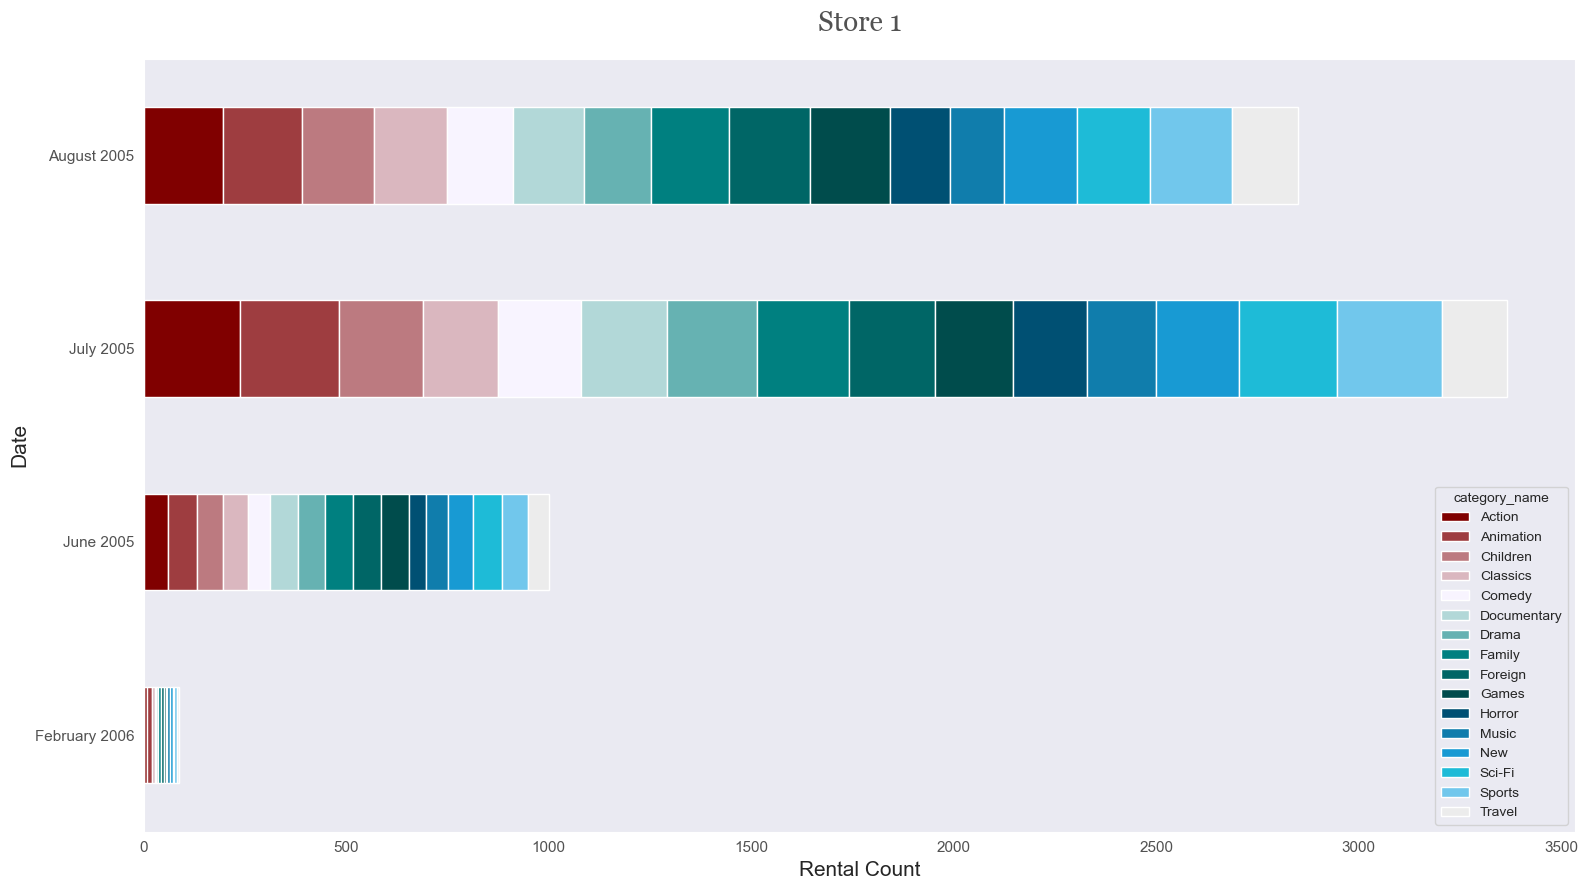

In [7]:
# Create our graph for Store 1

font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#800000', '#9e3d40', '#bc7a80','#dab7bf', '#f8f4ff', '#b2d8d8','#66b2b2','#008080',
         '#006666','#004c4c','#005073','#107dac','#189ad3','#1ebbd7','#71c7ec','#ececec'] # colors of each bars
sns.set_style('dark') # graph style

# Plot of data
ax = cat_store2.plot.barh(align='center', stacked=True, figsize=(16,9), color = colors)

# Title 
title = plt.title('Store 1', pad=20, fontsize=20, color=font_color, **csfont)
title.set_position([.5, 1.02])

# Axis Labels
ax.set_xlabel("Rental Count", fontsize = 15)
ax.set_ylabel("Date", fontsize = 15)

# Axis ticks        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(11)
plt.xticks(color=font_color)
plt.yticks(color=font_color)

plt.tight_layout()


In [8]:
conn.close()